In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, SimpleRNN, Dense
from tensorflow.keras.utils import to_categorical

In [2]:
max_features = 10000
max_len = 500
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

17464789/17464789 [==============================] - 0s 0us/step


In [3]:
def create_model(model_type):
    model = Sequential()
    model.add(Embedding(max_features, 32, input_length=max_len))
    if model_type == 'LSTM':
       model.add(LSTM(32))
    elif model_type == 'GRU':
      model.add(GRU(32))
    elif model_type == 'RNN':
          model.add(SimpleRNN(32))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [4]:
model_types = ['LSTM', 'GRU', 'RNN']
histories = []

In [5]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

Epoch 1/5
157/157 [==============================] - 34s 202ms/step - loss: 0.5265 - accuracy: 0.7286 - val_loss: 0.3325 - val_accuracy: 0.8630
Epoch 2/5
157/157 [==============================] - 29s 185ms/step - loss: 0.2717 - accuracy: 0.8941 - val_loss: 0.2976 - val_accuracy: 0.8774
Epoch 3/5
157/157 [==============================] - 33s 207ms/step - loss: 0.1845 - accuracy: 0.9350 - val_loss: 0.3242 - val_accuracy: 0.8796
Epoch 4/5
157/157 [==============================] - 29s 185ms/step - loss: 0.1440 - accuracy: 0.9501 - val_loss: 0.3130 - val_accuracy: 0.8854
Epoch 5/5
157/157 [==============================] - 30s 192ms/step - loss: 0.1135 - accuracy: 0.9625 - val_loss: 0.3471 - val_accuracy: 0.8680
Epoch 1/5
157/157 [==============================] - 31s 188ms/step - loss: 0.5224 - accuracy: 0.7211 - val_loss: 0.3615 - val_accuracy: 0.8446
Epoch 2/5
157/157 [==============================] - 28s 179ms/step - loss: 0.2660 - accuracy: 0.8967 - val_loss: 0.3251 - val_accuracy:

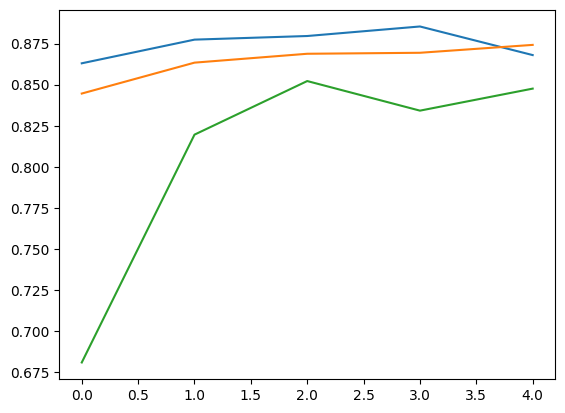

In [6]:

for model_type in model_types:
  model = create_model(model_type)
  history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2, verbose=1)
  plt.plot(history.history['val_accuracy'], label=f'{model_type} Validation Accuracy')

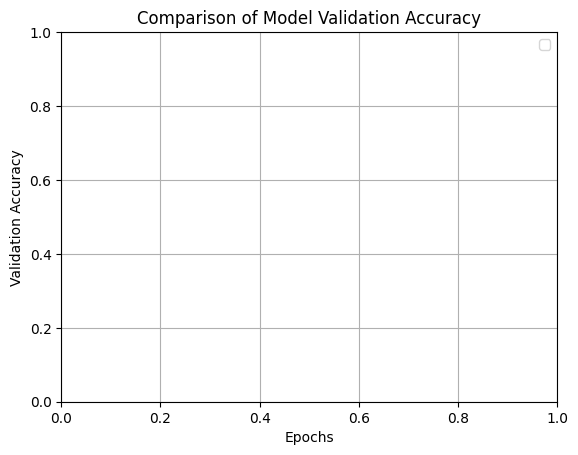

In [7]:
plt.title('Comparison of Model Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()